In [10]:
import traceback

In [11]:
from osp.wrappers.prec_nmc_wrappers import PrecFoamSession
from osp.wrappers.prec_nmc_wrappers.utils import plot_size_dist
from osp.core.namespaces import prec_nmc
from osp.core.utils import pretty_print
from osp.core.utils import Cuds2dot

In [12]:
prec_nmc_session = PrecFoamSession(delete_simulation_files=False)

In [13]:
wrapper = prec_nmc.PrecNMCWrapper(session=prec_nmc_session)

In [14]:
accuracy_level = prec_nmc.SliderAccuracyLevel(number=6)
wrapper.add(accuracy_level)

pressure = prec_nmc.Pressure(value=101325, unit='Pa')
wrapper.add(pressure)

temperature = prec_nmc.Temperature(value=298.15, unit='K')
wrapper.add(temperature)

rotationalSpeed = prec_nmc.RotationalSpeed(value=-1000, unit='rpm')
wrapper.add(rotationalSpeed)

<prec_nmc.RotationalSpeed: 294acec0-43fe-44b3-b981-1c242bc6185d,  PrecFoamSession: @0x7f16ad51e110>

In [15]:
density = prec_nmc.Density(value=3953, unit='kg/m^3')
molecularWeight = prec_nmc.MolecularWeight(value=92.3383, unit='g/mol')
shapeFactor = prec_nmc.ShapeFactor(value=0.523599, unit='')

solidParticle = prec_nmc.SolidParticle()
solidParticle.add(density, rel=prec_nmc.hasProperty)
solidParticle.add(molecularWeight, rel=prec_nmc.hasProperty)
solidParticle.add(shapeFactor, rel=prec_nmc.hasProperty)
wrapper.add(solidParticle)

<prec_nmc.SolidParticle: d7d87922-b16a-48ad-9e92-4767f5a592df,  PrecFoamSession: @0x7f16ad51e110>

In [16]:
ni_conc = prec_nmc.MolarConcentration(value=1.14, unit='mol/lit')
mn_conc = prec_nmc.MolarConcentration(value=0.38, unit='mol/lit')
co_conc = prec_nmc.MolarConcentration(value=0.38, unit='mol/lit')
nh3_conc = prec_nmc.MolarConcentration(value=13.36, unit='mol/lit')
naoh_conc = prec_nmc.MolarConcentration(value=10, unit='mol/lit')

ni = prec_nmc.Component(name='nickel')
mn = prec_nmc.Component(name='manganese')
co = prec_nmc.Component(name='cobalt')
nh3 = prec_nmc.Component(name='nh3')
naoh = prec_nmc.Component(name='naoh')

ni.add(ni_conc, rel=prec_nmc.hasPart)
mn.add(mn_conc, rel=prec_nmc.hasPart)
co.add(co_conc, rel=prec_nmc.hasPart)
nh3.add(nh3_conc, rel=prec_nmc.hasPart)
naoh.add(naoh_conc, rel=prec_nmc.hasPart)

<prec_nmc.MolarConcentration: f67d8bfa-cb7e-41f4-b20a-540e10edf99c,  CoreSession: @0x7f16ddec3e90>

In [17]:
metal_flowRate = prec_nmc.FlowRate(value=2.1977, unit='lit/hr')
nh3_flowRate = prec_nmc.FlowRate(value=0.2184, unit='lit/hr')
naoh_flowRate = prec_nmc.FlowRate(value=0.9171, unit='lit/hr')

In [18]:
metalFeed = prec_nmc.Feed(name='metals')
nh3Feed = prec_nmc.Feed(name='nh3')
naohFeed = prec_nmc.Feed(name='naoh')

metalFeed.add(ni, mn, co, rel=prec_nmc.hasPart)
metalFeed.add(metal_flowRate, rel=prec_nmc.hasPart)

nh3Feed.add(nh3, rel=prec_nmc.hasPart)
nh3Feed.add(nh3_flowRate, rel=prec_nmc.hasPart)

naohFeed.add(naoh, rel=prec_nmc.hasPart)
naohFeed.add(naoh_flowRate, rel=prec_nmc.hasPart)

wrapper.add(metalFeed)
wrapper.add(nh3Feed)
wrapper.add(naohFeed)

<prec_nmc.Feed: b28cbd76-bd35-40df-9c99-c739f9db0d91,  PrecFoamSession: @0x7f16ad51e110>

In [19]:
Cuds2dot(wrapper).render()

In [20]:
sizeDistribution = prec_nmc.SizeDistribution()
wrapper.add(sizeDistribution)

pretty_print(wrapper.get(oclass=prec_nmc.SizeDistribution)[0])

- Cuds object:
  uuid: 7ab4ce78-ce1e-45fc-a49b-7ca9138fb057
  type: prec_nmc.SizeDistribution
  superclasses: cuba.Entity, prec_nmc.SizeDistribution
  description: 
    To Be Determined



In [21]:
wrapper.session.run()


simpleFoamPrecNMC started


simpleFoamPrecNMC finished successfully

Reconstructing the particle size distribution with the following moments:
 [35014240000.0, 577952.5, 11.14264, 0.0002231277] 

Particle size distribution is updated



In [22]:
pretty_print(wrapper.get(oclass=prec_nmc.SizeDistribution)[0])

- Cuds object:
  uuid: 7ab4ce78-ce1e-45fc-a49b-7ca9138fb057
  type: prec_nmc.SizeDistribution
  superclasses: cuba.Entity, prec_nmc.SizeDistribution
  description: 
    To Be Determined

   |_Relationship prec_nmc.hasPart:
     -  prec_nmc.Bin cuds object:
     .  uuid: 6d9b097e-f079-4b81-8c8a-d6502dd1a8cf
     .  number: 5
     .   |_Relationship prec_nmc.hasPart:
     .     -  prec_nmc.ParticleDiameter cuds object:
     .     .  uuid: 026907bc-c316-452c-a963-fab8a7ec9dd7
     .     .  unit: micrometer
     .     .  value: 10.286068126354209
     .     -  prec_nmc.ParticleVolumePercentage cuds object:
     .        uuid: 05ebf8fc-6f15-4258-a9a2-2e73dfa7de80
     .        unit: 
     .        value: 0.5477920594082142
     -  prec_nmc.Bin cuds object:
     .  uuid: cfc0b42d-d8f8-4e64-83fd-724f9c9ff9e2
     .  number: 24
     .   |_Relationship prec_nmc.hasPart:
     .     -  prec_nmc.ParticleDiameter cuds object:
     .     .  uuid: d492430d-496d-4b1e-a0fd-fb5d5e30e1a7
     .     .  un

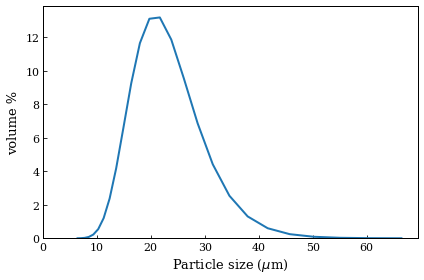

In [23]:
plot_size_dist(wrapper.get(oclass=prec_nmc.SizeDistribution)[0])